In [ ]:
%cd drive/MyDrive/MML/Kryptonite-N

/content/drive/MyDrive/MML/Kryptonite-N


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tempfile
import os
import numpy as np
import torch
from tqdm import tqdm
from torch import nn, optim
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer, GPT2Model
import pandas as pd
from tensorflow.keras.layers import Dropout, BatchNormalization
from tqdm import tqdm

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

## Code to Produce results for Extra Trees Described in the Report

### Kryptonite-9

In [ ]:
# Load data
X = np.load('Datasets/kryptonite-9-X.npy')
y = np.load('Datasets/kryptonite-9-y.npy')

# List of random seeds to iterate over
seeds = [42, 99, 123]

# Loop over different random seeds
for seed in seeds:
    print(f"\nEvaluating with Random Seed {seed}...\n")

    # Initialize the ExtraTreesClassifier model with the best hyperparameters
    et_model = ExtraTreesClassifier(
        n_estimators=200,            # n_estimators = 200 (number of trees)
        min_samples_split=2,         # min_samples_split = 2 (minimum samples required to split a node)
        min_samples_leaf=3,          # min_samples_leaf = 4 (minimum samples required at leaf nodes)
        random_state=seed           # Set the random seed here
    )

    # List to store the accuracy for each fold
    accuracies = []

    # Initialize KFold for cross-validation with the given seed
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)

    # Perform K-Fold Cross-Validation and print classification report for each fold
    degree = 4  # Degree of the polynomial features
    for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
        print(f"Fold {fold}")

        # Split data into training and validation sets based on the current fold
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Generate polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)

        # Fit the scaler only on the training set and transform both sets
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_poly)
        X_val_scaled = scaler.transform(X_val_poly)

        # Train the model on the training set
        et_model.fit(X_train_scaled, y_train)

        # Make predictions on the validation set
        y_val_pred = et_model.predict(X_val_scaled)

        # Calculate accuracy for the current fold
        fold_accuracy = accuracy_score(y_val, y_val_pred)
        accuracies.append(fold_accuracy)

        # Print the classification report for the current fold
        print(classification_report(y_val, y_val_pred))
        print("="*80)  # Separator for clarity between folds

    # Calculate mean and standard deviation of accuracy across all folds
    mean_accuracy = np.mean(accuracies)
    std_deviation = np.std(accuracies)

    print(f"Mean Accuracy for seed {seed}: {mean_accuracy:.4f}")
    print(f"Standard Deviation of Accuracy for seed {seed}: {std_deviation:.4f}")


Evaluating with Random Seed 42...

Fold 1
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1808
           1       0.96      0.96      0.96      1792

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Fold 2
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1786
           1       0.96      0.97      0.96      1814

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Fold 3
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1787
           1       0.96      0.96      0.96      1813

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg     

### Generating Labels for n = 9 with Extra Trees

In [ ]:
# Load the dataset
X_hidden = np.load('Datasets/hidden-kryptonite-9-X.npy')

# Ensure the dataset matches the required dimensions and transformations
degree = 4  # Degree of polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_hidden_poly = poly.fit_transform(X_hidden)

# Scale the dataset using a pre-fitted scaler
scaler = StandardScaler()
X_hidden_scaled = scaler.fit_transform(X_hidden_poly)

# Generate predictions for the hidden dataset
y_hidden_pred = et_model.predict(X_hidden_scaled)

# Save the predictions if needed
np.save('Datasets/y_predicted_9.npy', y_hidden_pred)

# Print the predictions
print("Predicted labels for kryptonite-9-X:")
print(len(y_hidden_pred))
print(y_hidden_pred)



Predicted labels for kryptonite-9-X:
10000
[0 1 0 ... 1 1 1]


### Kryptonite-12

In [ ]:
# Load data
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# List of random seeds to iterate over
seeds = [42, 99, 123]

# Loop over different random seeds
for seed in seeds:
    print(f"\nEvaluating with Random Seed {seed}...\n")

    # Initialize the ExtraTreesClassifier model with the best hyperparameters
    et_model = ExtraTreesClassifier(
        n_estimators=200,            # n_estimators = 200 (number of trees)
        min_samples_split=2,         # min_samples_split = 2 (minimum samples required to split a node)
        min_samples_leaf=2,          # min_samples_leaf = 4 (minimum samples required at leaf nodes)
        random_state=seed           # Set the random seed here
    )

    # List to store the accuracy for each fold
    accuracies = []

    # Initialize KFold for cross-validation with the given seed
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)

    # Perform K-Fold Cross-Validation and print classification report for each fold
    degree = 4  # Degree of the polynomial features
    for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
        print(f"Fold {fold}")

        # Split data into training and validation sets based on the current fold
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Generate polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)

        # Fit the scaler only on the training set and transform both sets
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_poly)
        X_val_scaled = scaler.transform(X_val_poly)

        # Train the model on the training set
        et_model.fit(X_train_scaled, y_train)

        # Make predictions on the validation set
        y_val_pred = et_model.predict(X_val_scaled)

        # Calculate accuracy for the current fold
        fold_accuracy = accuracy_score(y_val, y_val_pred)
        accuracies.append(fold_accuracy)

        # Print the classification report for the current fold
        print(classification_report(y_val, y_val_pred))
        print("="*80)  # Separator for clarity between folds

    # Calculate mean and standard deviation of accuracy across all folds
    mean_accuracy = np.mean(accuracies)
    std_deviation = np.std(accuracies)

    print(f"Mean Accuracy for seed {seed}: {mean_accuracy:.4f}")
    print(f"Standard Deviation of Accuracy for seed {seed}: {std_deviation:.4f}")


Evaluating with Random Seed 42...

Fold 1
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      2396
           1       0.83      0.88      0.86      2404

    accuracy                           0.85      4800
   macro avg       0.85      0.85      0.85      4800
weighted avg       0.85      0.85      0.85      4800

Fold 2
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2341
           1       0.85      0.87      0.86      2459

    accuracy                           0.86      4800
   macro avg       0.86      0.86      0.86      4800
weighted avg       0.86      0.86      0.86      4800

Fold 3
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      2350
           1       0.87      0.89      0.88      2450

    accuracy                           0.88      4800
   macro avg       0.88      0.88      0.88      4800
weighted avg     

### Kryptonite-15

In [ ]:
# Load data
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

# List of random seeds to iterate over
seeds = [42, 99, 123]

# Loop over different random seeds
for seed in seeds:
    print(f"\nEvaluating with Random Seed {seed}...\n")

    # Initialize the ExtraTreesClassifier model with the best hyperparameters
    et_model = ExtraTreesClassifier(
        n_estimators=200,            # n_estimators = 200 (number of trees)
        min_samples_split=2,         # min_samples_split = 2 (minimum samples required to split a node)
        min_samples_leaf=2,          # min_samples_leaf = 4 (minimum samples required at leaf nodes)
        random_state=seed           # Set the random seed here
    )

    # List to store the accuracy for each fold
    accuracies = []

    # Initialize KFold for cross-validation with the given seed
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)

    # Perform K-Fold Cross-Validation and print classification report for each fold
    degree = 4  # Degree of the polynomial features
    for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
        print(f"Fold {fold}")

        # Split data into training and validation sets based on the current fold
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Generate polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)

        # Fit the scaler only on the training set and transform both sets
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_poly)
        X_val_scaled = scaler.transform(X_val_poly)

        # Train the model on the training set
        et_model.fit(X_train_scaled, y_train)

        # Make predictions on the validation set
        y_val_pred = et_model.predict(X_val_scaled)

        # Calculate accuracy for the current fold
        fold_accuracy = accuracy_score(y_val, y_val_pred)
        accuracies.append(fold_accuracy)

        # Print the classification report for the current fold
        print(classification_report(y_val, y_val_pred))
        print("="*80)  # Separator for clarity between folds

    # Calculate mean and standard deviation of accuracy across all folds
    mean_accuracy = np.mean(accuracies)
    std_deviation = np.std(accuracies)

    print(f"Mean Accuracy for seed {seed}: {mean_accuracy:.4f}")
    print(f"Standard Deviation of Accuracy for seed {seed}: {std_deviation:.4f}")


Evaluating with Random Seed 42...

Fold 1
              precision    recall  f1-score   support

           0       0.53      0.51      0.52      3008
           1       0.52      0.54      0.53      2992

    accuracy                           0.52      6000
   macro avg       0.52      0.52      0.52      6000
weighted avg       0.52      0.52      0.52      6000

Fold 2
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      3009
           1       0.52      0.53      0.53      2991

    accuracy                           0.52      6000
   macro avg       0.52      0.52      0.52      6000
weighted avg       0.52      0.52      0.52      6000

Fold 3
              precision    recall  f1-score   support

           0       0.54      0.53      0.53      3024
           1       0.53      0.54      0.54      2976

    accuracy                           0.53      6000
   macro avg       0.53      0.53      0.53      6000
weighted avg     

## Code to Produce results for Neural Networks Described in the Report

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

def cross_validate_with_seeds(X, y, seeds=[42, 99, 123]):
    class NeuralNet(nn.Module):
        def __init__(self, input_dim):
            super(NeuralNet, self).__init__()
            self.layers = nn.Sequential(
                nn.Linear(input_dim, 128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Linear(64, 1),
                nn.Sigmoid()
            )

        def forward(self, x):
            return self.layers(x)

    def train_model(model, train_loader, val_loader, criterion, optimizer, patience=10, device='cpu'):
        best_loss = float('inf')
        epochs_no_improve = 0
        best_model_state = None

        for epoch in range(100):
            model.train()
            for X_batch, y_batch in train_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                optimizer.zero_grad()
                outputs = model(X_batch).squeeze()
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()

            # Validation phase
            if val_loader is not None:
                model.eval()
                val_loss = 0.0
                with torch.no_grad():
                    for X_val, y_val in val_loader:
                        X_val, y_val = X_val.to(device), y_val.to(device)
                        val_outputs = model(X_val).squeeze()
                        val_loss += criterion(val_outputs, y_val).item()

                val_loss /= len(val_loader)

                # Early stopping
                if val_loss < best_loss:
                    best_loss = val_loss
                    best_model_state = model.state_dict()
                    epochs_no_improve = 0
                else:
                    epochs_no_improve += 1
                    if epochs_no_improve >= patience:
                        model.load_state_dict(best_model_state)
                        break

        model.load_state_dict(best_model_state)
        return model

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input_dim = X.shape[1]
    seed_mean_accuracies = []
    seed_std_accuracies = []

    for seed in seeds:
        print(f"\nRandom Seed: {seed}")
        kf = KFold(n_splits=5, shuffle=True, random_state=seed)

        fold_accuracies = []

        # K-fold Cross-validation
        for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
            print(f"  Fold {fold}")

            # Split into training and validation sets
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            # Standardize the training and validation data separately
            scaler = StandardScaler()
            X_train_scaled = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
            X_val_scaled = torch.tensor(scaler.transform(X_val), dtype=torch.float32)

            # Create DataLoaders
            train_dataset = TensorDataset(X_train_scaled, torch.tensor(y_train, dtype=torch.float32))
            val_dataset = TensorDataset(X_val_scaled, torch.tensor(y_val, dtype=torch.float32))
            train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
            val_loader = DataLoader(val_dataset, batch_size=128)

            # Initialize model, criterion, and optimizer
            model = NeuralNet(input_dim).to(device)
            criterion = nn.BCELoss()
            optimizer = optim.Adam(model.parameters(), lr=0.001)

            # Train the model with early stopping
            model = train_model(model, train_loader, val_loader, criterion, optimizer, device=device)

            # Evaluate on validation set
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_val_scaled.to(device)).cpu().squeeze()
                y_val_pred = (val_outputs > 0.5).int()
                accuracy = accuracy_score(y_val, y_val_pred)
                fold_accuracies.append(accuracy)

        # Calculate mean accuracy for the current seed
        mean_accuracy = np.mean(fold_accuracies)
        std_acc = np.std(fold_accuracies)
        seed_mean_accuracies.append(mean_accuracy)
        seed_std_accuracies.append(std_acc)

        print(f"Random Seed {seed}: Mean Accuracy = {mean_accuracy:.4f}, Std = {std_acc:.4f}")
        print("=" * 80)

    # Plotting error bars
    plt.figure(figsize=(8, 5))
    plt.errorbar(seeds, seed_mean_accuracies, yerr=seed_std_accuracies, fmt='o', capsize=5, capthick=2)
    plt.xlabel("Random Seed")
    plt.ylabel("Mean Accuracy")
    plt.title("Model Stability with Different Random Seeds")
    plt.grid(True)
    plt.show()

    return seed_mean_accuracies, seed_std_accuracies, model

### Kryptonite-9


Random Seed: 42
  Fold 1
  Fold 2
  Fold 3
  Fold 4
  Fold 5
Random Seed 42: Mean Accuracy = 0.9580, Std = 0.0029

Random Seed: 99
  Fold 1
  Fold 2
  Fold 3
  Fold 4
  Fold 5
Random Seed 99: Mean Accuracy = 0.9573, Std = 0.0035

Random Seed: 123
  Fold 1
  Fold 2
  Fold 3
  Fold 4
  Fold 5
Random Seed 123: Mean Accuracy = 0.9576, Std = 0.0028


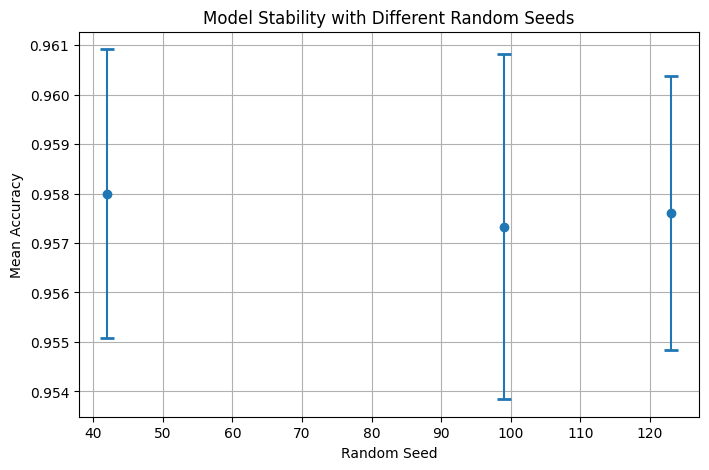

In [ ]:
# Load data
X = np.load('Datasets/kryptonite-9-X.npy')
y = np.load('Datasets/kryptonite-9-y.npy')

# Call the function
mean_accuracies, seed_std_accuracies, model = cross_validate_with_seeds(X, y)

### Kryptonite-12


Random Seed: 42
  Fold 1
  Fold 2
  Fold 3
  Fold 4
  Fold 5
Random Seed 42: Mean Accuracy = 0.9575, Std = 0.0024

Random Seed: 99
  Fold 1
  Fold 2
  Fold 3
  Fold 4
  Fold 5
Random Seed 99: Mean Accuracy = 0.9586, Std = 0.0018

Random Seed: 123
  Fold 1
  Fold 2
  Fold 3
  Fold 4
  Fold 5
Random Seed 123: Mean Accuracy = 0.9582, Std = 0.0035


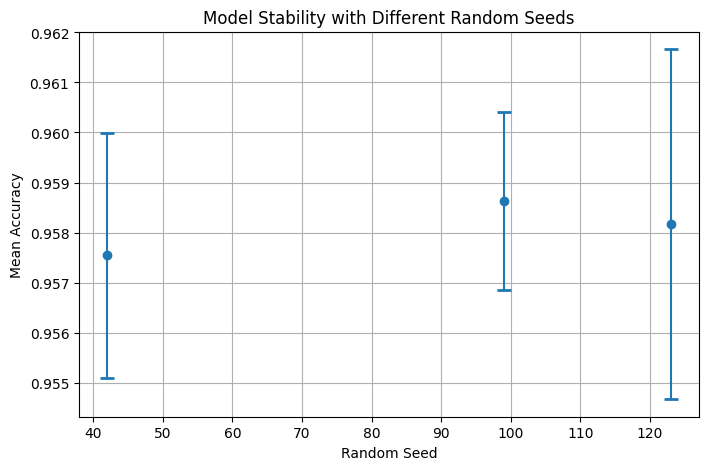

In [ ]:
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# Call the function
mean_accuracies, seed_std_accuracies, model12 = cross_validate_with_seeds(X, y)

### Generating Labels for n = 12 with Neural Networks

In [ ]:
# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load hidden dataset
X_hidden = np.load('Datasets/hidden-kryptonite-12-X.npy')

# Standardize the hidden dataset using the scaler
scaler = StandardScaler()
X_hidden_scaled = torch.tensor(scaler.fit_transform(X_hidden), dtype=torch.float32)



# Predict on hidden dataset
with torch.no_grad():
    outputs = model12(X_hidden_scaled.to(device)).cpu().squeeze()  # Get raw probabilities
    y_hidden_pred12 = (outputs > 0.5).int()  # Convert probabilities to binary labels

# Save or print predictions
np.save('Datasets/y_predicted_12.npy', y_hidden_pred12.numpy())  # Save predictions
print("Predicted labels for kryptonite-12-X:")
print(len(y_hidden_pred12.numpy()))  # Print predictions


Predicted labels for kryptonite-12-X:
10000


### Kryptonite-15


Random Seed: 42
  Fold 1
  Fold 2
  Fold 3
  Fold 4
  Fold 5
Random Seed 42: Mean Accuracy = 0.9345, Std = 0.0053

Random Seed: 99
  Fold 1
  Fold 2
  Fold 3
  Fold 4
  Fold 5
Random Seed 99: Mean Accuracy = 0.9359, Std = 0.0034

Random Seed: 123
  Fold 1
  Fold 2
  Fold 3
  Fold 4
  Fold 5
Random Seed 123: Mean Accuracy = 0.9387, Std = 0.0027


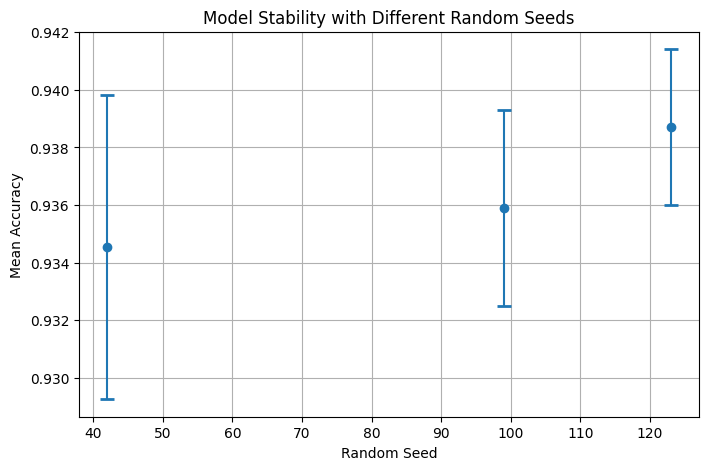

In [ ]:
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

# Call the function
mean_accuracies, seed_std_accuracies, model15 = cross_validate_with_seeds(X, y)

### Generating Labels for n = 15 with Neural Networks

In [ ]:
# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load hidden dataset
X_hidden = np.load('Datasets/hidden-kryptonite-15-X.npy')

# Standardize the hidden dataset using the scaler
scaler = StandardScaler()
X_hidden_scaled = torch.tensor(scaler.fit_transform(X_hidden), dtype=torch.float32)



# Predict on hidden dataset
with torch.no_grad():
    outputs = model15(X_hidden_scaled.to(device)).cpu().squeeze()  # Get raw probabilities
    y_hidden_pred15 = (outputs > 0.5).int()  # Convert probabilities to binary labels

# Save or print predictions
np.save('Datasets/y_predicted_15.npy', y_hidden_pred15.numpy())  # Save predictions
print("Predicted labels for kryptonite-15-X:")
print(len(y_hidden_pred15.numpy()))  # Print predictions

Predicted labels for kryptonite-15-X:
10000


### Kryptonite-18


Random Seed: 42
  Fold 1
  Fold 2
  Fold 3
  Fold 4
  Fold 5
Random Seed 42: Mean Accuracy = 0.6646, Std = 0.1755

Random Seed: 99
  Fold 1
  Fold 2
  Fold 3
  Fold 4
  Fold 5
Random Seed 99: Mean Accuracy = 0.8683, Std = 0.0156

Random Seed: 123
  Fold 1
  Fold 2
  Fold 3
  Fold 4
  Fold 5
Random Seed 123: Mean Accuracy = 0.8149, Std = 0.1468


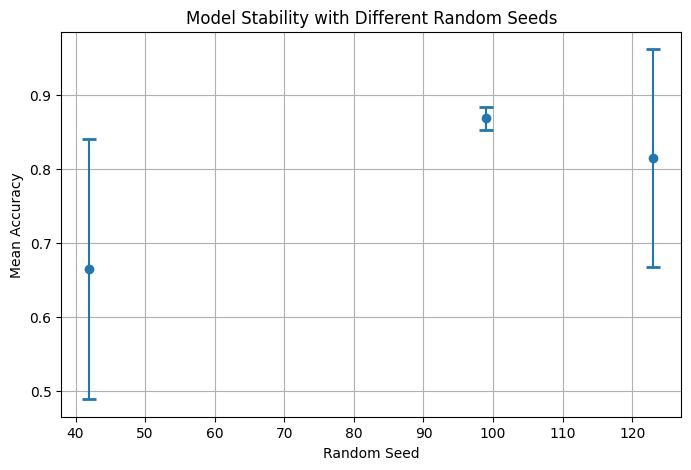

In [ ]:
X = np.load('Datasets/kryptonite-18-X.npy')
y = np.load('Datasets/kryptonite-18-y.npy')

# Call the function
mean_accuracies, seed_std_accuracies, model18 = cross_validate_with_seeds(X, y)

### Kryptonite-24


Random Seed: 42
  Fold 1
  Fold 2
  Fold 3
  Fold 4
  Fold 5
Random Seed 42: Mean Accuracy = 0.4993, Std = 0.0063

Random Seed: 99
  Fold 1
  Fold 2
  Fold 3
  Fold 4
  Fold 5
Random Seed 99: Mean Accuracy = 0.4988, Std = 0.0046

Random Seed: 123
  Fold 1
  Fold 2
  Fold 3
  Fold 4
  Fold 5
Random Seed 123: Mean Accuracy = 0.4982, Std = 0.0044


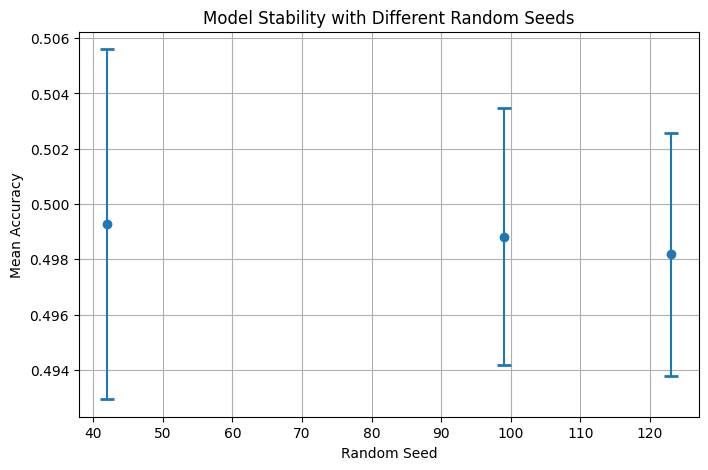

In [ ]:
X = np.load('Datasets/kryptonite-24-X.npy')
y = np.load('Datasets/kryptonite-24-y.npy')

# Call the function
mean_accuracies, seed_std_accuracies, model24 = cross_validate_with_seeds(X, y)

## Code to Produce results for Resnets Described in the Report

### Kryptonite-18

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from torch.utils.data import DataLoader, TensorDataset
import os

# 3. Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 4. Define Xavier initialization function
def init_weights_xavier(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)  # Initialize biases to zero for consistency

# 5. Define a single ResNet Block with Batch Normalization and Dropout
class ResNetBlock(nn.Module):
    def __init__(self, size):
        super(ResNetBlock, self).__init__()
        self.fc1 = nn.Linear(size, size)
        self.bn1 = nn.BatchNorm1d(size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(size, size)
        self.bn2 = nn.BatchNorm1d(size)

    def forward(self, x):
        residual = x
        out = self.relu(self.bn1(self.fc1(x)))
        out = self.bn2(self.fc2(out))
        out += residual
        out = self.relu(out)
        return out

# 6. Define the complete ResNet architecture with deeper layers and doubled size
class DeepResNet(nn.Module):
    def __init__(self, input_size):
        super(DeepResNet, self).__init__()
        self.fc_initial = nn.Linear(input_size, 512)
        self.block1 = ResNetBlock(512)
        self.block2 = ResNetBlock(512)
        self.block3 = ResNetBlock(512)  # Additional ResNet block
        self.block4 = ResNetBlock(512)  # Additional ResNet block
        self.fc_final = nn.Linear(512, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Dropout with 50% rate for the final layer

    def forward(self, x):
        x = self.relu(self.fc_initial(x))
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.dropout(x)
        x = torch.sigmoid(self.fc_final(x))
        return x

# 7. Discretize features function
def discretize_data(X, strategy='uniform', n_bins=10):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
    X_discretized = discretizer.fit_transform(X)
    return X_discretized

# 8. Load and preprocess the data with optional discretization
def load_data(n, discretize=False, n_bins=10, strategy='uniform'):
    base_path = 'Datasets/'
    X = np.load(os.path.join(base_path, f'kryptonite-{n}-X.npy'))
    y = np.load(os.path.join(base_path, f'kryptonite-{n}-y.npy'))

    # If n=24, attempt to load additional data
    if n == 24:
        additional_X_path = os.path.join(base_path, f'additional-kryptonite-{n}-X.npy')
        additional_y_path = os.path.join(base_path, f'additional-kryptonite-{n}-y.npy')
        if os.path.exists(additional_X_path) and os.path.exists(additional_y_path):
            additional_X = np.load(additional_X_path)
            additional_y = np.load(additional_y_path)
            X = np.vstack((X, additional_X))
            y = np.concatenate((y, additional_y))
            print(f"Loaded additional data for n={n}: {additional_X.shape[0]} samples")
        else:
            print(f"No additional data found for n={n}. Proceeding with original dataset.")

    # Split into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Optionally discretize the data
    if discretize:
        X_train = discretize_data(X_train, strategy=strategy, n_bins=n_bins)
        X_val = discretize_data(X_val, strategy=strategy, n_bins=n_bins)
        X_test = discretize_data(X_test, strategy=strategy, n_bins=n_bins)

    return X_train, X_val, X_test, y_train, y_val, y_test

# 9. Set batch size
batch_size = 256  # Adjust as needed

# 10. Train the DeepResNet model with mini-batch gradient descent and early stopping
def train_model(X_train, y_train, X_val, y_val, input_size, num_epochs=500, learning_rate=0.001, patience=10):
    # Convert data to PyTorch tensors and create DataLoader for mini-batches
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1).to(device)

    # Initialize model, apply Xavier initialization, loss function, and optimizer
    model = DeepResNet(input_size).to(device)
    model.apply(init_weights_xavier)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)

    # Track losses and accuracies for plotting
    train_losses = []
    val_losses = []
    val_accuracies = []
    best_val_loss = float('inf')
    patience_counter = 0

    # Training loop with early stopping
    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0  # To accumulate the training loss over all batches

        # Loop over mini-batches
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch)
            train_loss = criterion(output, y_batch)
            train_loss.backward()
            optimizer.step()
            epoch_train_loss += train_loss.item()  # Accumulate training loss

        # Average training loss over all batches for the epoch
        train_losses.append(epoch_train_loss / len(train_loader))

        # Validation loss and accuracy
        model.eval()
        with torch.no_grad():
            val_output = model(X_val_tensor)
            val_loss = criterion(val_output, y_val_tensor)
            val_pred = (val_output > 0.5).float()
            val_accuracy = accuracy_score(y_val_tensor.cpu().numpy(), val_pred.cpu().numpy())

            # Record validation loss and accuracy
            val_losses.append(val_loss.item())
            val_accuracies.append(val_accuracy)

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, '
                  f'Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}')

    return model, train_losses, val_losses, val_accuracies

# 11. Evaluate the model on the test set
def evaluate_model(model, X_test, y_test):
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)
    model.eval()
    with torch.no_grad():
        test_output = model(X_test_tensor)
        test_pred = (test_output > 0.5).float()
        test_accuracy = accuracy_score(y_test_tensor.cpu().numpy(), test_pred.cpu().numpy())
    print(f'Test Accuracy: {test_accuracy:.4f}')
    return test_accuracy

# 12. Plot losses and accuracies
def plot_metrics(train_losses, val_losses, val_accuracies, dataset_name):
    epochs_train = range(1, len(train_losses) + 1)
    epochs_val = range(1, len(val_losses) + 1)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

    # Plot training and validation losses
    ax1.plot(epochs_train, train_losses, label="Train Loss")
    ax1.plot(epochs_val, val_losses, label="Validation Loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.set_title(f"{dataset_name} Loss over Epochs")
    ax1.legend()

    # Plot validation accuracy
    epochs_val_acc = range(1, len(val_accuracies) + 1)
    ax2.plot(epochs_val_acc, val_accuracies, label="Validation Accuracy", color='green')
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.set_title(f"{dataset_name} Validation Accuracy over Epochs")
    ax2.legend()

    plt.tight_layout()
    plt.show()


def main():
    possible_n_vals = [18]  # Adjust based on dataset availability
    num_runs = 5  # Number of times to run the script

    best_model = None  # To store the model with the highest accuracy
    best_accuracy = -float('inf')  # Initialize to a very low value

    for n in possible_n_vals:
        print(f"\nDataset kryptonite-{n}")

        # Test performance with and without discretization
        for discretize in [False]:
            print(f"\nDiscretization: {'Enabled' if discretize else 'Disabled'}")

            accuracies = []  # To store test accuracies for each run

            for run in range(num_runs):
                print(f"\nRun {run + 1}/{num_runs}")
                X_train, X_val, X_test, y_train, y_val, y_test = load_data(
                    n,
                    discretize=discretize,
                    n_bins=10,
                    strategy='quantile' if discretize else 'uniform'
                )
                input_size = X_train.shape[1]

                # Train and evaluate the model
                model18, train_losses, val_losses, val_accuracies = train_model(
                    X_train, y_train, X_val, y_val, input_size
                )
                test_accuracy = evaluate_model(model18, X_test, y_test)

                # Append the accuracy to the list
                accuracies.append(test_accuracy)

                # Check if this model is the best so far
                if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_model = model18

                # Optionally plot metrics for each run
                if run == 5:
                  plot_metrics(
                      train_losses,
                      val_losses,
                      val_accuracies,
                      f"Run {run + 1} - Dataset kryptonite-{n} (Discretization: {'Enabled' if discretize else 'Disabled'})"
                  )

            # Compute and print the average and standard deviation
            avg_accuracy = np.mean(accuracies)
            std_accuracy = np.std(accuracies)
            print(f"\nSummary for Dataset kryptonite-{n} (Discretization: {'Enabled' if discretize else 'Disabled'}):")
            print(f"Average Test Accuracy: {avg_accuracy:.4f}")
            print(f"Standard Deviation of Test Accuracy: {std_accuracy:.4f}")

    return best_model

# Call main and access the best model
model18 = main()


Using device: cuda

Dataset kryptonite-18

Discretization: Disabled

Run 1/5
Epoch [1/500], Train Loss: 1.2665, Val Loss: 0.8411, Val Accuracy: 0.4979
Epoch [10/500], Train Loss: 0.5348, Val Loss: 0.8319, Val Accuracy: 0.4947
Epoch [20/500], Train Loss: 0.3875, Val Loss: 1.0844, Val Accuracy: 0.5021
Epoch [30/500], Train Loss: 0.2828, Val Loss: 1.3592, Val Accuracy: 0.5081
Epoch [40/500], Train Loss: 0.1950, Val Loss: 1.5446, Val Accuracy: 0.5104
Epoch [50/500], Train Loss: 0.1526, Val Loss: 1.6220, Val Accuracy: 0.5250
Epoch [60/500], Train Loss: 0.1383, Val Loss: 1.5440, Val Accuracy: 0.5452
Epoch [70/500], Train Loss: 0.1270, Val Loss: 1.4652, Val Accuracy: 0.5698
Epoch [80/500], Train Loss: 0.1151, Val Loss: 1.3950, Val Accuracy: 0.5932
Epoch [90/500], Train Loss: 0.1058, Val Loss: 1.3069, Val Accuracy: 0.6261
Epoch [100/500], Train Loss: 0.0731, Val Loss: 1.3409, Val Accuracy: 0.6466
Epoch [110/500], Train Loss: 0.0679, Val Loss: 1.1883, Val Accuracy: 0.6842
Epoch [120/500], Train

### Generating Labels for n = 18 with Resnets

In [ ]:
# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load hidden dataset
X_hidden = np.load('Datasets/hidden-kryptonite-18-X.npy')

# Standardize the hidden dataset using the scaler
scaler = StandardScaler()
X_hidden_scaled = torch.tensor(scaler.fit_transform(X_hidden), dtype=torch.float32)

# Predict on hidden dataset
with torch.no_grad():
    outputs = model18(X_hidden_scaled.to(device)).cpu().squeeze()  # Get raw probabilities
    y_hidden_pred18 = (outputs > 0.5).int()  # Convert probabilities to binary labels

# Save or print predictions
np.save('Datasets/y_predicted_18.npy', y_hidden_pred18.numpy())  # Save predictions
print("Predicted labels for kryptonite-18-X:")
print(len(y_hidden_pred18.numpy()))  # Print predictions

Predicted labels for kryptonite-18-X:
10000


### Kryptonite-24

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from torch.utils.data import DataLoader, TensorDataset
import os



# 3. Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 4. Define Xavier initialization function
def init_weights_xavier(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)  # Initialize biases to zero for consistency

# 5. Define a single ResNet Block with Batch Normalization and Dropout
class ResNetBlock(nn.Module):
    def __init__(self, size):
        super(ResNetBlock, self).__init__()
        self.fc1 = nn.Linear(size, size)
        self.bn1 = nn.BatchNorm1d(size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(size, size)
        self.bn2 = nn.BatchNorm1d(size)

    def forward(self, x):
        residual = x
        out = self.relu(self.bn1(self.fc1(x)))
        out = self.bn2(self.fc2(out))
        out += residual
        out = self.relu(out)
        return out

# 6. Define the complete ResNet architecture with deeper layers and doubled size
class DeepResNet(nn.Module):
    def __init__(self, input_size):
        super(DeepResNet, self).__init__()
        self.fc_initial = nn.Linear(input_size, 512)
        self.block1 = ResNetBlock(512)
        self.block2 = ResNetBlock(512)
        self.block3 = ResNetBlock(512)  # Additional ResNet block
        self.block4 = ResNetBlock(512)  # Additional ResNet block
        self.fc_final = nn.Linear(512, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Dropout with 50% rate for the final layer

    def forward(self, x):
        x = self.relu(self.fc_initial(x))
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.dropout(x)
        x = torch.sigmoid(self.fc_final(x))
        return x

# 7. Discretize features function
def discretize_data(X, strategy='uniform', n_bins=10):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
    X_discretized = discretizer.fit_transform(X)
    return X_discretized

# 8. Load and preprocess the data with optional discretization
def load_data(n, discretize=False, n_bins=10, strategy='uniform'):
    base_path = 'Datasets/'
    X = np.load(os.path.join(base_path, f'kryptonite-{n}-X.npy'))
    y = np.load(os.path.join(base_path, f'kryptonite-{n}-y.npy'))

    # If n=24, attempt to load additional data
    if n == 24:
        additional_X_path = os.path.join(base_path, f'additional-kryptonite-{n}-X.npy')
        additional_y_path = os.path.join(base_path, f'additional-kryptonite-{n}-y.npy')
        if os.path.exists(additional_X_path) and os.path.exists(additional_y_path):
            additional_X = np.load(additional_X_path)
            additional_y = np.load(additional_y_path)
            X = np.vstack((X, additional_X))
            y = np.concatenate((y, additional_y))
            print(f"Loaded additional data for n={n}: {additional_X.shape[0]} samples")
        else:
            print(f"No additional data found for n={n}. Proceeding with original dataset.")

    # Split into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Optionally discretize the data
    if discretize:
        X_train = discretize_data(X_train, strategy=strategy, n_bins=n_bins)
        X_val = discretize_data(X_val, strategy=strategy, n_bins=n_bins)
        X_test = discretize_data(X_test, strategy=strategy, n_bins=n_bins)

    return X_train, X_val, X_test, y_train, y_val, y_test

# 9. Set batch size
batch_size = 1024  # Adjust as needed

# 10. Train the DeepResNet model with mini-batch gradient descent and early stopping
def train_model(X_train, y_train, X_val, y_val, input_size, num_epochs=80, learning_rate=0.001, patience=10):
    # Convert data to PyTorch tensors and create DataLoader for mini-batches
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1).to(device)

    # Initialize model, apply Xavier initialization, loss function, and optimizer
    model = DeepResNet(input_size).to(device)
    model.apply(init_weights_xavier)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)

    # Track losses and accuracies for plotting
    train_losses = []
    val_losses = []
    val_accuracies = []
    best_val_loss = float('inf')
    patience_counter = 0

    # Training loop with early stopping
    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0  # To accumulate the training loss over all batches

        # Loop over mini-batches
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch)
            train_loss = criterion(output, y_batch)
            train_loss.backward()
            optimizer.step()
            epoch_train_loss += train_loss.item()  # Accumulate training loss

        # Average training loss over all batches for the epoch
        train_losses.append(epoch_train_loss / len(train_loader))

        # Validation loss and accuracy
        model.eval()
        with torch.no_grad():
            val_output = model(X_val_tensor)
            val_loss = criterion(val_output, y_val_tensor)
            val_pred = (val_output > 0.5).float()
            val_accuracy = accuracy_score(y_val_tensor.cpu().numpy(), val_pred.cpu().numpy())

            # Record validation loss and accuracy
            val_losses.append(val_loss.item())
            val_accuracies.append(val_accuracy)

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, '
                  f'Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}')

    return model, train_losses, val_losses, val_accuracies

# 11. Evaluate the model on the test set
def evaluate_model(model, X_test, y_test):
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)
    model.eval()
    with torch.no_grad():
        test_output = model(X_test_tensor)
        test_pred = (test_output > 0.5).float()
        test_accuracy = accuracy_score(y_test_tensor.cpu().numpy(), test_pred.cpu().numpy())
    print(f'Test Accuracy: {test_accuracy:.4f}')
    return test_accuracy

# 12. Plot losses and accuracies
def plot_metrics(train_losses, val_losses, val_accuracies, dataset_name):
    epochs_train = range(1, len(train_losses) + 1)
    epochs_val = range(1, len(val_losses) + 1)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

    # Plot training and validation losses
    ax1.plot(epochs_train, train_losses, label="Train Loss")
    ax1.plot(epochs_val, val_losses, label="Validation Loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.set_title(f"{dataset_name} Loss over Epochs")
    ax1.legend()

    # Plot validation accuracy
    epochs_val_acc = range(1, len(val_accuracies) + 1)
    ax2.plot(epochs_val_acc, val_accuracies, label="Validation Accuracy", color='green')
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.set_title(f"{dataset_name} Validation Accuracy over Epochs")
    ax2.legend()

    plt.tight_layout()
    plt.show()


def main():
    possible_n_vals = [24]  # Adjust based on dataset availability
    num_runs = 5  # Number of times to run the script

    best_model = None  # To store the model with the highest accuracy
    best_accuracy = -float('inf')  # Initialize to a very low value

    for n in possible_n_vals:
        print(f"\nDataset kryptonite-{n}")

        # Test performance with and without discretization
        for discretize in [False]:
            print(f"\nDiscretization: {'Enabled' if discretize else 'Disabled'}")

            accuracies = []  # To store test accuracies for each run

            for run in range(num_runs):
                print(f"\nRun {run + 1}/{num_runs}")
                X_train, X_val, X_test, y_train, y_val, y_test = load_data(
                    n,
                    discretize=discretize,
                    n_bins=10,
                    strategy='quantile' if discretize else 'uniform'
                )
                input_size = X_train.shape[1]

                # Train and evaluate the model
                model24, train_losses, val_losses, val_accuracies = train_model(
                    X_train, y_train, X_val, y_val, input_size
                )
                test_accuracy = evaluate_model(model24, X_test, y_test)

                # Append the accuracy to the list
                accuracies.append(test_accuracy)

                # Check if this model is the best so far
                if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_model = model24

                # Optionally plot metrics for each run
                if run == 5:
                  plot_metrics(
                      train_losses,
                      val_losses,
                      val_accuracies,
                      f"Run {run + 1} - Dataset kryptonite-{n} (Discretization: {'Enabled' if discretize else 'Disabled'})"
                  )

            # Compute and print the average and standard deviation
            avg_accuracy = np.mean(accuracies)
            std_accuracy = np.std(accuracies)
            print(f"\nSummary for Dataset kryptonite-{n} (Discretization: {'Enabled' if discretize else 'Disabled'}):")
            print(f"Average Test Accuracy: {avg_accuracy:.4f}")
            print(f"Standard Deviation of Test Accuracy: {std_accuracy:.4f}")

    return best_model

# Call main and access the best model
model24 = main()

Using device: cuda

Dataset kryptonite-24

Discretization: Disabled

Run 1/5
Loaded additional data for n=24: 250000 samples
Epoch [1/80], Train Loss: 0.9981, Val Loss: 0.7167, Val Accuracy: 0.5008
Epoch [10/80], Train Loss: 0.6892, Val Loss: 0.6967, Val Accuracy: 0.4987
Epoch [20/80], Train Loss: 0.6903, Val Loss: 0.6948, Val Accuracy: 0.4988
Epoch [30/80], Train Loss: 0.5259, Val Loss: 0.5219, Val Accuracy: 0.7617
Epoch [40/80], Train Loss: 0.3087, Val Loss: 0.2966, Val Accuracy: 0.8734
Epoch [50/80], Train Loss: 0.1799, Val Loss: 0.1846, Val Accuracy: 0.9418
Epoch [60/80], Train Loss: 0.1549, Val Loss: 0.1663, Val Accuracy: 0.9511
Epoch [70/80], Train Loss: 0.1465, Val Loss: 0.1673, Val Accuracy: 0.9523
Epoch [80/80], Train Loss: 0.1413, Val Loss: 0.1637, Val Accuracy: 0.9542
Test Accuracy: 0.9552

Run 2/5
Loaded additional data for n=24: 250000 samples
Epoch [1/80], Train Loss: 0.9767, Val Loss: 0.7048, Val Accuracy: 0.5011
Epoch [10/80], Train Loss: 0.6892, Val Loss: 0.6947, Val A

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from torch.utils.data import DataLoader, TensorDataset
import os



# 3. Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 4. Define Xavier initialization function
def init_weights_xavier(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)  # Initialize biases to zero for consistency

# 5. Define a single ResNet Block with Batch Normalization and Dropout
class ResNetBlock(nn.Module):
    def __init__(self, size):
        super(ResNetBlock, self).__init__()
        self.fc1 = nn.Linear(size, size)
        self.bn1 = nn.BatchNorm1d(size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(size, size)
        self.bn2 = nn.BatchNorm1d(size)

    def forward(self, x):
        residual = x
        out = self.relu(self.bn1(self.fc1(x)))
        out = self.bn2(self.fc2(out))
        out += residual
        out = self.relu(out)
        return out

# 6. Define the complete ResNet architecture with deeper layers and doubled size
class DeepResNet(nn.Module):
    def __init__(self, input_size):
        super(DeepResNet, self).__init__()
        self.fc_initial = nn.Linear(input_size, 512)
        self.block1 = ResNetBlock(512)
        self.block2 = ResNetBlock(512)
        self.block3 = ResNetBlock(512)  # Additional ResNet block
        self.block4 = ResNetBlock(512)  # Additional ResNet block
        self.fc_final = nn.Linear(512, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Dropout with 50% rate for the final layer

    def forward(self, x):
        x = self.relu(self.fc_initial(x))
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.dropout(x)
        x = torch.sigmoid(self.fc_final(x))
        return x

# 7. Discretize features function
def discretize_data(X, strategy='uniform', n_bins=10):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
    X_discretized = discretizer.fit_transform(X)
    return X_discretized

# 8. Load and preprocess the data with optional discretization
def load_data(n, discretize=False, n_bins=10, strategy='uniform'):
    base_path = 'Datasets/'
    X = np.load(os.path.join(base_path, f'kryptonite-{n}-X.npy'))
    y = np.load(os.path.join(base_path, f'kryptonite-{n}-y.npy'))

    # If n=24, attempt to load additional data
    if n == 24:
        additional_X_path = os.path.join(base_path, f'additional-kryptonite-{n}-X.npy')
        additional_y_path = os.path.join(base_path, f'additional-kryptonite-{n}-y.npy')
        if os.path.exists(additional_X_path) and os.path.exists(additional_y_path):
            additional_X = np.load(additional_X_path)
            additional_y = np.load(additional_y_path)
            X = np.vstack((X, additional_X))
            y = np.concatenate((y, additional_y))
            print(f"Loaded additional data for n={n}: {additional_X.shape[0]} samples")
        else:
            print(f"No additional data found for n={n}. Proceeding with original dataset.")

    # Split into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Optionally discretize the data
    if discretize:
        X_train = discretize_data(X_train, strategy=strategy, n_bins=n_bins)
        X_val = discretize_data(X_val, strategy=strategy, n_bins=n_bins)
        X_test = discretize_data(X_test, strategy=strategy, n_bins=n_bins)

    return X_train, X_val, X_test, y_train, y_val, y_test

# 9. Set batch size
batch_size = 1024  # Adjust as needed

# 10. Train the DeepResNet model with mini-batch gradient descent and early stopping
def train_model(X_train, y_train, X_val, y_val, input_size, num_epochs=80, learning_rate=0.001, patience=10):
    # Convert data to PyTorch tensors and create DataLoader for mini-batches
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1).to(device)

    # Initialize model, apply Xavier initialization, loss function, and optimizer
    model = DeepResNet(input_size).to(device)
    model.apply(init_weights_xavier)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)

    # Track losses and accuracies for plotting
    train_losses = []
    val_losses = []
    val_accuracies = []
    best_val_loss = float('inf')
    patience_counter = 0

    # Training loop with early stopping
    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0  # To accumulate the training loss over all batches

        # Loop over mini-batches
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch)
            train_loss = criterion(output, y_batch)
            train_loss.backward()
            optimizer.step()
            epoch_train_loss += train_loss.item()  # Accumulate training loss

        # Average training loss over all batches for the epoch
        train_losses.append(epoch_train_loss / len(train_loader))

        # Validation loss and accuracy
        model.eval()
        with torch.no_grad():
            val_output = model(X_val_tensor)
            val_loss = criterion(val_output, y_val_tensor)
            val_pred = (val_output > 0.5).float()
            val_accuracy = accuracy_score(y_val_tensor.cpu().numpy(), val_pred.cpu().numpy())

            # Record validation loss and accuracy
            val_losses.append(val_loss.item())
            val_accuracies.append(val_accuracy)

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, '
                  f'Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}')

    return model, train_losses, val_losses, val_accuracies

# 11. Evaluate the model on the test set
def evaluate_model(model, X_test, y_test):
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)
    model.eval()
    with torch.no_grad():
        test_output = model(X_test_tensor)
        test_pred = (test_output > 0.5).float()
        test_accuracy = accuracy_score(y_test_tensor.cpu().numpy(), test_pred.cpu().numpy())
    print(f'Test Accuracy: {test_accuracy:.4f}')
    return test_accuracy

# 12. Plot losses and accuracies
def plot_metrics(train_losses, val_losses, val_accuracies, dataset_name):
    epochs_train = range(1, len(train_losses) + 1)
    epochs_val = range(1, len(val_losses) + 1)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

    # Plot training and validation losses
    ax1.plot(epochs_train, train_losses, label="Train Loss")
    ax1.plot(epochs_val, val_losses, label="Validation Loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.set_title(f"{dataset_name} Loss over Epochs")
    ax1.legend()

    # Plot validation accuracy
    epochs_val_acc = range(1, len(val_accuracies) + 1)
    ax2.plot(epochs_val_acc, val_accuracies, label="Validation Accuracy", color='green')
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.set_title(f"{dataset_name} Validation Accuracy over Epochs")
    ax2.legend()

    plt.tight_layout()
    plt.show()


def main():
    possible_n_vals = [24]  # Adjust based on dataset availability
    num_runs = 5  # Number of times to run the script

    best_model = None  # To store the model with the highest accuracy
    best_accuracy = -float('inf')  # Initialize to a very low value

    for n in possible_n_vals:
        print(f"\nDataset kryptonite-{n}")

        # Test performance with and without discretization
        for discretize in [False]:
            print(f"\nDiscretization: {'Enabled' if discretize else 'Disabled'}")

            accuracies = []  # To store test accuracies for each run

            for run in range(num_runs):
                print(f"\nRun {run + 1}/{num_runs}")
                X_train, X_val, X_test, y_train, y_val, y_test = load_data(
                    n,
                    discretize=discretize,
                    n_bins=10,
                    strategy='quantile' if discretize else 'uniform'
                )
                input_size = X_train.shape[1]

                # Train and evaluate the model
                model24, train_losses, val_losses, val_accuracies = train_model(
                    X_train, y_train, X_val, y_val, input_size
                )
                test_accuracy = evaluate_model(model24, X_test, y_test)

                # Append the accuracy to the list
                accuracies.append(test_accuracy)

                # Check if this model is the best so far
                if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_model = model24

                # Optionally plot metrics for each run
                if run == 5:
                  plot_metrics(
                      train_losses,
                      val_losses,
                      val_accuracies,
                      f"Run {run + 1} - Dataset kryptonite-{n} (Discretization: {'Enabled' if discretize else 'Disabled'})"
                  )

            # Compute and print the average and standard deviation
            avg_accuracy = np.mean(accuracies)
            std_accuracy = np.std(accuracies)
            print(f"\nSummary for Dataset kryptonite-{n} (Discretization: {'Enabled' if discretize else 'Disabled'}):")
            print(f"Average Test Accuracy: {avg_accuracy:.4f}")
            print(f"Standard Deviation of Test Accuracy: {std_accuracy:.4f}")

    return best_model

# Call main and access the best model
model24 = main()


Using device: cuda

Dataset kryptonite-24

Discretization: Disabled

Run 1/5
Loaded additional data for n=24: 250000 samples
Epoch [1/80], Train Loss: 0.9554, Val Loss: 0.7028, Val Accuracy: 0.4970
Epoch [10/80], Train Loss: 0.6898, Val Loss: 0.6947, Val Accuracy: 0.4980
Epoch [20/80], Train Loss: 0.6907, Val Loss: 0.6940, Val Accuracy: 0.5015
Epoch [30/80], Train Loss: 0.4819, Val Loss: 0.4841, Val Accuracy: 0.7925
Epoch [40/80], Train Loss: 0.2920, Val Loss: 0.2891, Val Accuracy: 0.8770
Epoch [50/80], Train Loss: 0.2431, Val Loss: 0.2567, Val Accuracy: 0.8852
Epoch [60/80], Train Loss: 0.2273, Val Loss: 0.2465, Val Accuracy: 0.8926
Epoch [70/80], Train Loss: 0.1513, Val Loss: 0.1721, Val Accuracy: 0.9498
Epoch [80/80], Train Loss: 0.1392, Val Loss: 0.1739, Val Accuracy: 0.9497
Test Accuracy: 0.9512

Run 2/5
Loaded additional data for n=24: 250000 samples
Epoch [1/80], Train Loss: 0.9872, Val Loss: 0.7028, Val Accuracy: 0.4997
Epoch [10/80], Train Loss: 0.6902, Val Loss: 0.6961, Val A

### Generating Labels for n = 24 with Resnets

In [ ]:
# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load hidden dataset
X_hidden = np.load('Datasets/hidden-kryptonite-24-X.npy')

# Standardize the hidden dataset using the scaler
scaler = StandardScaler()
X_hidden_scaled = torch.tensor(scaler.fit_transform(X_hidden), dtype=torch.float32)

# Predict on hidden dataset
with torch.no_grad():
    outputs = model24(X_hidden_scaled.to(device)).cpu().squeeze()  # Get raw probabilities
    y_hidden_pred24 = (outputs > 0.5).int()  # Convert probabilities to binary labels

# Save or print predictions
np.save('Datasets/y_predicted_24.npy', y_hidden_pred24.numpy())  # Save predictions
print("Predicted labels for kryptonite-24-X:")
print(len(y_hidden_pred24.numpy()))  # Print predictions

Predicted labels for kryptonite-24-X:
10000


## Code to produce results for Logistic Regression Described in the Report

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from numpy.linalg import eigvals

# Define possible values for n and degree (polynomial expansion) and C
possible_n_vals = [9]
degree = 6  # Polynomial degree set to 6
possible_C_vals = [0.001,0.01, 0.1, 0.5, 0.85]  # Different C values to test

def calculate_condition_number(X_poly):
    """Calculate the condition number of the Hessian without regularization."""
    m, n = X_poly.shape
    theta = np.zeros(n)
    predictions = 1 / (1 + np.exp(-X_poly @ theta))
    D = np.diag(predictions * (1 - predictions))
    H = X_poly.T @ D @ X_poly / m  # Hessian without regularization
    eigenvalues = eigvals(H)
    condition_number = np.abs(eigenvalues.max()) / np.abs(eigenvalues.min())
    return condition_number

def run_poly_logistic_regression(n, C_val):
    # Load dataset
    X = np.load(f'Datasets/kryptonite-{n}-X.npy')
    y = np.load(f'Datasets/kryptonite-{n}-y.npy')

    # Split data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Standardize the data before polynomial expansion
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Create polynomial features of specified degree
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)

    # Calculate the condition number without regularization
    condition_number_no_reg = calculate_condition_number(X_train_poly)

    # Initialize and fit logistic regression with the given C value
    logreg = LogisticRegression(max_iter=500, solver='sag', C=C_val)
    logreg.fit(X_train_poly, y_train)

    # Calculate the condition number with regularization (approximation)
    H_reg = X_train_poly.T @ np.diag(logreg.predict_proba(X_train_poly)[:, 1] *
                                     (1 - logreg.predict_proba(X_train_poly)[:, 1])) @ X_train_poly / X_train_poly.shape[0] + (1 / C_val) * np.eye(X_train_poly.shape[1])
    eigenvalues_reg = eigvals(H_reg)
    condition_number_with_reg = np.abs(eigenvalues_reg.max()) / np.abs(eigenvalues_reg.min())

    # Evaluate on the validation set
    y_val_pred = logreg.predict(X_val_poly)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Evaluate on the test set
    y_test_pred = logreg.predict(X_test_poly)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Print results for the current C value
    print(f"C = {C_val}")
    print(f"Validation Accuracy: {val_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(f"Condition Number without Regularization: {condition_number_no_reg:.4f}")
    print(f"Condition Number with Regularization (C={C_val}): {condition_number_with_reg:.4f}\n")

    return test_accuracy, condition_number_with_reg

# Run the experiment
for n in possible_n_vals:
    print(f"\nDataset kryptonite-{n}, Polynomial Degree {degree}")
    for C_val in possible_C_vals:
        run_poly_logistic_regression(n, C_val)


Dataset kryptonite-9, Polynomial Degree 6
C = 0.001
Validation Accuracy: 0.9424, Test Accuracy: 0.9478
Condition Number without Regularization: 2035465400890.6296
Condition Number with Regularization (C=0.001): 1.0406

C = 0.01
Validation Accuracy: 0.9457, Test Accuracy: 0.9483
Condition Number without Regularization: 2035465400890.6296
Condition Number with Regularization (C=0.01): 1.1718



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C = 0.1
Validation Accuracy: 0.9335, Test Accuracy: 0.9380
Condition Number without Regularization: 2035465400890.6296
Condition Number with Regularization (C=0.1): 2.0830



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C = 0.5
Validation Accuracy: 0.9322, Test Accuracy: 0.9357
Condition Number without Regularization: 2035465400890.6296
Condition Number with Regularization (C=0.5): 5.8409



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C = 0.85
Validation Accuracy: 0.9319, Test Accuracy: 0.9357
Condition Number without Regularization: 2035465400890.6296
Condition Number with Regularization (C=0.85): 9.2290



## Code to produce Grid Search Results for Extra Trees for best hyperparameter selection

### Kryptonite-9

In [ ]:
# Load data
X = np.load('Datasets/kryptonite-9-X.npy')
y = np.load('Datasets/kryptonite-9-y.npy')

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for polynomial features, scaling, and Extra Trees Classifier
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),   # Step 1: Polynomial feature generation
    ('scaler', StandardScaler()),                       # Step 2: Standardize the features
    ('extra_trees', ExtraTreesClassifier(random_state=42))  # Step 3: Extra Trees Classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'extra_trees__n_estimators': [100, 200],            # Number of trees in the forest
    'extra_trees__min_samples_leaf': [2, 3, 4],           # Maximum depth of each tree
    'extra_trees__min_samples_split': [2,3],           # Minimum samples required to split a node
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Use all available processors
    verbose=2,          # Display progress
    scoring='accuracy'
)

# Run the grid search on the training set
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters found:")
print(best_params)
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")

# Evaluate the best model on the test set to check for generalization
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Hyperparameters found:
{'extra_trees__min_samples_leaf': 3, 'extra_trees__min_samples_split': 2, 'extra_trees__n_estimators': 200}
Best Cross-Validated Accuracy: 0.9534
Test Accuracy: 0.9556


### Kryptonite-12

In [ ]:
# Load data
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for polynomial features, scaling, and Extra Trees Classifier
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),   # Step 1: Polynomial feature generation
    ('scaler', StandardScaler()),                       # Step 2: Standardize the features
    ('extra_trees', ExtraTreesClassifier(random_state=42))  # Step 3: Extra Trees Classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'extra_trees__n_estimators': [100, 200],            # Number of trees in the forest
    'extra_trees__min_samples_leaf': [2, 3, 4],           # Maximum depth of each tree
    'extra_trees__min_samples_split': [2,3],           # Minimum samples required to split a node
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Use all available processors
    verbose=2,          # Display progress
    scoring='accuracy'
)

# Run the grid search on the training set
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters found:")
print(best_params)
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")

# Evaluate the best model on the test set to check for generalization
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Hyperparameters found:
{'extra_trees__min_samples_leaf': 2, 'extra_trees__min_samples_split': 2, 'extra_trees__n_estimators': 200}
Best Cross-Validated Accuracy: 0.6651
Test Accuracy: 0.6935


### Kryptonite-15

In [ ]:
# Load data
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for polynomial features, scaling, and Extra Trees Classifier
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),   # Step 1: Polynomial feature generation
    ('scaler', StandardScaler()),                       # Step 2: Standardize the features
    ('extra_trees', ExtraTreesClassifier(random_state=42))  # Step 3: Extra Trees Classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'extra_trees__n_estimators': [100, 200],            # Number of trees in the forest
    'extra_trees__min_samples_leaf': [2, 3, 4],           # Maximum depth of each tree
    'extra_trees__min_samples_split': [2,3],           # Minimum samples required to split a node
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Use all available processors
    verbose=2,          # Display progress
    scoring='accuracy'
)

# Run the grid search on the training set
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters found:")
print(best_params)
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")

# Evaluate the best model on the test set to check for generalization
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Hyperparameters found:
{'extra_trees__min_samples_leaf': 2, 'extra_trees__min_samples_split': 2, 'extra_trees__n_estimators': 200}
Best Cross-Validated Accuracy: 0.5045
Test Accuracy: 0.5178


## Code to produce Grid Search Results for Neural Networks for best hyperparameter selection

### Kryptonite-9

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import itertools

# Load and preprocess data
X = np.load('Datasets/kryptonite-9-X.npy')
y = np.load('Datasets/kryptonite-9-y.npy')

# Split the data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_full = torch.tensor(X_train_full, dtype=torch.float32)
y_train_full = torch.tensor(y_train_full, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define neural network architecture
class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, patience=10):
    best_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    for epoch in range(100):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        # Validation phase
        if val_loader is not None:
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for X_val, y_val in val_loader:
                    X_val, y_val = X_val.to(device), y_val.to(device)
                    val_outputs = model(X_val).squeeze()
                    val_loss += criterion(val_outputs, y_val).item()

            val_loss /= len(val_loader)

            # Early stopping logic
            if val_loss < best_loss:
                best_loss = val_loss
                best_model_state = model.state_dict()
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= patience:
                    model.load_state_dict(best_model_state)
                    break
        else:
            best_model_state = model.state_dict()

    model.load_state_dict(best_model_state)
    return model

# Define hyperparameter grid
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
param_grid = itertools.product(learning_rates, batch_sizes)

# Initialize device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_train_full.shape[1]

# Store results
results = []

# Perform grid search
for lr, batch_size in param_grid:
    print(f"Testing combination: Learning Rate={lr}, Batch Size={batch_size}")

    # Initialize K-Fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_accuracies = []

    for fold, (train_index, val_index) in enumerate(kf.split(X_train_full), 1):
        # Split into training and validation sets
        X_train, X_val = X_train_full[train_index], X_train_full[val_index]
        y_train, y_val = y_train_full[train_index], y_train_full[val_index]

        # Standardize the data
        scaler = StandardScaler()
        X_train_scaled = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
        X_val_scaled = torch.tensor(scaler.transform(X_val), dtype=torch.float32)

        # Create DataLoaders
        train_dataset = TensorDataset(X_train_scaled, y_train)
        val_dataset = TensorDataset(X_val_scaled, y_val)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)

        # Initialize model, criterion, and optimizer
        model = NeuralNet(input_dim).to(device)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Train the model
        model = train_model(model, train_loader, val_loader, criterion, optimizer)

        # Evaluate on validation set
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_scaled.to(device)).cpu().squeeze()
            y_val_pred = (val_outputs > 0.5).int()
            accuracy = accuracy_score(y_val, y_val_pred)
            fold_accuracies.append(accuracy)

    # Average accuracy for this parameter combination
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    results.append({'learning_rate': lr, 'batch_size': batch_size, 'accuracy': avg_accuracy})
    print(f"Average Accuracy for Learning Rate={lr}, Batch Size={batch_size}: {avg_accuracy:.4f}")

# Find the best combination
best_params = max(results, key=lambda x: x['accuracy'])
print(f"\nBest Parameters: Learning Rate={best_params['learning_rate']}, Batch Size={best_params['batch_size']}")
print(f"Best Accuracy: {best_params['accuracy']:.4f}")

# Train final model using best parameters on the full training set
scaler = StandardScaler()
X_train_scaled_full = torch.tensor(scaler.fit_transform(X_train_full), dtype=torch.float32)
X_test_scaled = torch.tensor(scaler.transform(X_test), dtype=torch.float32)

final_model = NeuralNet(input_dim).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(final_model.parameters(), lr=best_params['learning_rate'])
train_dataset_full = TensorDataset(X_train_scaled_full, y_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=best_params['batch_size'], shuffle=True)

final_model = train_model(final_model, train_loader_full, None, criterion, optimizer)

# Evaluate the final model on the test set
final_model.eval()
with torch.no_grad():
    test_outputs = final_model(X_test_scaled.to(device)).cpu().squeeze()
    y_test_pred = (test_outputs > 0.5).int()

# Print final classification report
print("Final Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Testing combination: Learning Rate=0.001, Batch Size=32
Average Accuracy for Learning Rate=0.001, Batch Size=32: 0.9576
Testing combination: Learning Rate=0.001, Batch Size=64
Average Accuracy for Learning Rate=0.001, Batch Size=64: 0.9573
Testing combination: Learning Rate=0.001, Batch Size=128
Average Accuracy for Learning Rate=0.001, Batch Size=128: 0.9576
Testing combination: Learning Rate=0.01, Batch Size=32
Average Accuracy for Learning Rate=0.01, Batch Size=32: 0.9481
Testing combination: Learning Rate=0.01, Batch Size=64
Average Accuracy for Learning Rate=0.01, Batch Size=64: 0.9549
Testing combination: Learning Rate=0.01, Batch Size=128
Average Accuracy for Learning Rate=0.01, Batch Size=128: 0.9547
Testing combination: Learning Rate=0.1, Batch Size=32
Average Accuracy for Learning Rate=0.1, Batch Size=32: 0.4963
Testing combination: Learning Rate=0.1, Batch Size=64
Average Accuracy for Learning Rate=0.1, Batch Size=64: 0.5263
Testing combination: Learning Rate=0.1, Batch Size

### Kryptonite-12

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import itertools

# Load and preprocess data
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# Split the data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_full = torch.tensor(X_train_full, dtype=torch.float32)
y_train_full = torch.tensor(y_train_full, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define neural network architecture
class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, patience=10):
    best_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    for epoch in range(100):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        # Validation phase
        if val_loader is not None:
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for X_val, y_val in val_loader:
                    X_val, y_val = X_val.to(device), y_val.to(device)
                    val_outputs = model(X_val).squeeze()
                    val_loss += criterion(val_outputs, y_val).item()

            val_loss /= len(val_loader)

            # Early stopping logic
            if val_loss < best_loss:
                best_loss = val_loss
                best_model_state = model.state_dict()
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= patience:
                    model.load_state_dict(best_model_state)
                    break
        else:
            best_model_state = model.state_dict()

    model.load_state_dict(best_model_state)
    return model

# Define hyperparameter grid
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
param_grid = itertools.product(learning_rates, batch_sizes)

# Initialize device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_train_full.shape[1]

# Store results
results = []

# Perform grid search
for lr, batch_size in param_grid:
    print(f"Testing combination: Learning Rate={lr}, Batch Size={batch_size}")

    # Initialize K-Fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_accuracies = []

    for fold, (train_index, val_index) in enumerate(kf.split(X_train_full), 1):
        # Split into training and validation sets
        X_train, X_val = X_train_full[train_index], X_train_full[val_index]
        y_train, y_val = y_train_full[train_index], y_train_full[val_index]

        # Standardize the data
        scaler = StandardScaler()
        X_train_scaled = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
        X_val_scaled = torch.tensor(scaler.transform(X_val), dtype=torch.float32)

        # Create DataLoaders
        train_dataset = TensorDataset(X_train_scaled, y_train)
        val_dataset = TensorDataset(X_val_scaled, y_val)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)

        # Initialize model, criterion, and optimizer
        model = NeuralNet(input_dim).to(device)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Train the model
        model = train_model(model, train_loader, val_loader, criterion, optimizer)

        # Evaluate on validation set
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_scaled.to(device)).cpu().squeeze()
            y_val_pred = (val_outputs > 0.5).int()
            accuracy = accuracy_score(y_val, y_val_pred)
            fold_accuracies.append(accuracy)

    # Average accuracy for this parameter combination
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    results.append({'learning_rate': lr, 'batch_size': batch_size, 'accuracy': avg_accuracy})
    print(f"Average Accuracy for Learning Rate={lr}, Batch Size={batch_size}: {avg_accuracy:.4f}")

# Find the best combination
best_params = max(results, key=lambda x: x['accuracy'])
print(f"\nBest Parameters: Learning Rate={best_params['learning_rate']}, Batch Size={best_params['batch_size']}")
print(f"Best Accuracy: {best_params['accuracy']:.4f}")

# Train final model using best parameters on the full training set
scaler = StandardScaler()
X_train_scaled_full = torch.tensor(scaler.fit_transform(X_train_full), dtype=torch.float32)
X_test_scaled = torch.tensor(scaler.transform(X_test), dtype=torch.float32)

final_model = NeuralNet(input_dim).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(final_model.parameters(), lr=best_params['learning_rate'])
train_dataset_full = TensorDataset(X_train_scaled_full, y_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=best_params['batch_size'], shuffle=True)

final_model = train_model(final_model, train_loader_full, None, criterion, optimizer)

# Evaluate the final model on the test set
final_model.eval()
with torch.no_grad():
    test_outputs = final_model(X_test_scaled.to(device)).cpu().squeeze()
    y_test_pred = (test_outputs > 0.5).int()

# Print final classification report
print("Final Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Testing combination: Learning Rate=0.001, Batch Size=32
Average Accuracy for Learning Rate=0.001, Batch Size=64: 0.9518
Testing combination: Learning Rate=0.001, Batch Size=128
Average Accuracy for Learning Rate=0.001, Batch Size=128: 0.9542
Testing combination: Learning Rate=0.01, Batch Size=32
Average Accuracy for Learning Rate=0.01, Batch Size=32: 0.5097
Testing combination: Learning Rate=0.01, Batch Size=64
Average Accuracy for Learning Rate=0.01, Batch Size=64: 0.9125
Testing combination: Learning Rate=0.01, Batch Size=128
Average Accuracy for Learning Rate=0.01, Batch Size=128: 0.9471
Testing combination: Learning Rate=0.1, Batch Size=32
Average Accuracy for Learning Rate=0.1, Batch Size=32: 0.5097
Testing combination: Learning Rate=0.1, Batch Size=64
Average Accuracy for Learning Rate=0.1, Batch Size=64: 0.5024
Testing combination: Learning Rate=0.1, Batch Size=128
Average Accuracy for Learning Rate=0.1, Batch Size=128: 0.5048

Best Parameters: Learning Rate=0.001, Batch Size=12

### Kryptonite-15

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import itertools

# Load and preprocess data
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

# Split the data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_full = torch.tensor(X_train_full, dtype=torch.float32)
y_train_full = torch.tensor(y_train_full, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define neural network architecture
class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, patience=10):
    best_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    for epoch in range(100):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        # Validation phase
        if val_loader is not None:
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for X_val, y_val in val_loader:
                    X_val, y_val = X_val.to(device), y_val.to(device)
                    val_outputs = model(X_val).squeeze()
                    val_loss += criterion(val_outputs, y_val).item()

            val_loss /= len(val_loader)

            # Early stopping logic
            if val_loss < best_loss:
                best_loss = val_loss
                best_model_state = model.state_dict()
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= patience:
                    model.load_state_dict(best_model_state)
                    break
        else:
            best_model_state = model.state_dict()

    model.load_state_dict(best_model_state)
    return model

# Define hyperparameter grid
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
param_grid = itertools.product(learning_rates, batch_sizes)

# Initialize device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_train_full.shape[1]

# Store results
results = []

# Perform grid search
for lr, batch_size in param_grid:
    print(f"Testing combination: Learning Rate={lr}, Batch Size={batch_size}")

    # Initialize K-Fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_accuracies = []

    for fold, (train_index, val_index) in enumerate(kf.split(X_train_full), 1):
        # Split into training and validation sets
        X_train, X_val = X_train_full[train_index], X_train_full[val_index]
        y_train, y_val = y_train_full[train_index], y_train_full[val_index]

        # Standardize the data
        scaler = StandardScaler()
        X_train_scaled = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
        X_val_scaled = torch.tensor(scaler.transform(X_val), dtype=torch.float32)

        # Create DataLoaders
        train_dataset = TensorDataset(X_train_scaled, y_train)
        val_dataset = TensorDataset(X_val_scaled, y_val)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)

        # Initialize model, criterion, and optimizer
        model = NeuralNet(input_dim).to(device)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Train the model
        model = train_model(model, train_loader, val_loader, criterion, optimizer)

        # Evaluate on validation set
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_scaled.to(device)).cpu().squeeze()
            y_val_pred = (val_outputs > 0.5).int()
            accuracy = accuracy_score(y_val, y_val_pred)
            fold_accuracies.append(accuracy)

    # Average accuracy for this parameter combination
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    results.append({'learning_rate': lr, 'batch_size': batch_size, 'accuracy': avg_accuracy})
    print(f"Average Accuracy for Learning Rate={lr}, Batch Size={batch_size}: {avg_accuracy:.4f}")

# Find the best combination
best_params = max(results, key=lambda x: x['accuracy'])
print(f"\nBest Parameters: Learning Rate={best_params['learning_rate']}, Batch Size={best_params['batch_size']}")
print(f"Best Accuracy: {best_params['accuracy']:.4f}")

# Train final model using best parameters on the full training set
scaler = StandardScaler()
X_train_scaled_full = torch.tensor(scaler.fit_transform(X_train_full), dtype=torch.float32)
X_test_scaled = torch.tensor(scaler.transform(X_test), dtype=torch.float32)

final_model = NeuralNet(input_dim).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(final_model.parameters(), lr=best_params['learning_rate'])
train_dataset_full = TensorDataset(X_train_scaled_full, y_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=best_params['batch_size'], shuffle=True)

final_model = train_model(final_model, train_loader_full, None, criterion, optimizer)

# Evaluate the final model on the test set
final_model.eval()
with torch.no_grad():
    test_outputs = final_model(X_test_scaled.to(device)).cpu().squeeze()
    y_test_pred = (test_outputs > 0.5).int()

# Print final classification report
print("Final Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Testing combination: Learning Rate=0.001, Batch Size=32
Average Accuracy for Learning Rate=0.001, Batch Size=32: 0.9328
Testing combination: Learning Rate=0.001, Batch Size=64
Average Accuracy for Learning Rate=0.001, Batch Size=64: 0.9298
Testing combination: Learning Rate=0.001, Batch Size=128
Average Accuracy for Learning Rate=0.001, Batch Size=128: 0.9331
Testing combination: Learning Rate=0.01, Batch Size=32
Average Accuracy for Learning Rate=0.01, Batch Size=32: 0.4966
Testing combination: Learning Rate=0.01, Batch Size=64
Average Accuracy for Learning Rate=0.01, Batch Size=64: 0.5551
Testing combination: Learning Rate=0.01, Batch Size=128
Average Accuracy for Learning Rate=0.01, Batch Size=128: 0.8500
Testing combination: Learning Rate=0.1, Batch Size=32
Average Accuracy for Learning Rate=0.1, Batch Size=32: 0.4965
Testing combination: Learning Rate=0.1, Batch Size=64
Average Accuracy for Learning Rate=0.1, Batch Size=64: 0.5013
Testing combination: Learning Rate=0.1, Batch Size

## Code to produce Plots and Figures in Report

### Code to reproduce Model Stability for Extra Trees

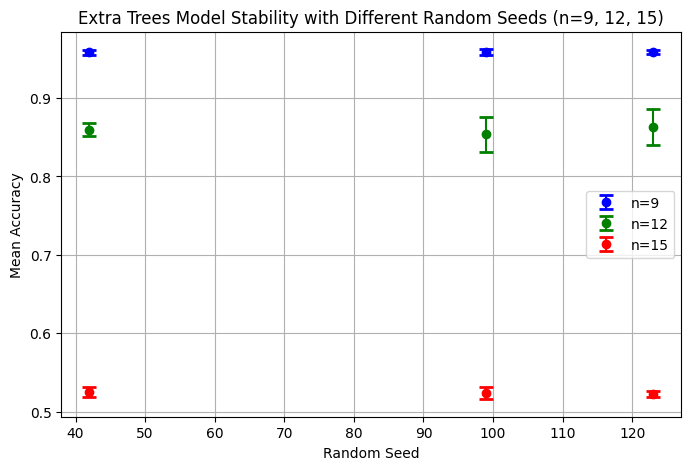

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for each dataset (n=9, n=12, n=15)
seeds = [42, 99, 123]

# Results generated from previous sections in the notebook

mean_accuracies_9 = [0.9580, 0.9582, 0.9582]
std_accuracies_9 = [0.0031, 0.0039, 0.0028]

mean_accuracies_12 = [0.8594, 0.8536, 0.8633]
std_accuracies_12 = [0.0083, 0.0227, 0.0229]

mean_accuracies_15 = [0.5248, 0.5235, 0.5229]
std_accuracies_15 = [0.0062, 0.0075, 0.0036]


# Plotting error bars for all three datasets on the same plot
plt.figure(figsize=(8, 5))

# n=9
plt.errorbar(seeds, mean_accuracies_9, yerr=std_accuracies_9, fmt='o', label='n=9', color='b', capsize=5, capthick=2)

# n=12
plt.errorbar(seeds, mean_accuracies_12, yerr=std_accuracies_12, fmt='o', label='n=12', color='g', capsize=5, capthick=2)

# n=15
plt.errorbar(seeds, mean_accuracies_15, yerr=std_accuracies_15, fmt='o', label='n=15', color='r', capsize=5, capthick=2)


# Add labels and title
plt.xlabel("Random Seed")
plt.ylabel("Mean Accuracy")
plt.title("Extra Trees Model Stability with Different Random Seeds (n=9, 12, 15)")
plt.grid(True)

# Display legend
plt.legend()

# Show the plot
plt.show()

### Code to reproduce Model Stability for Neural Networks

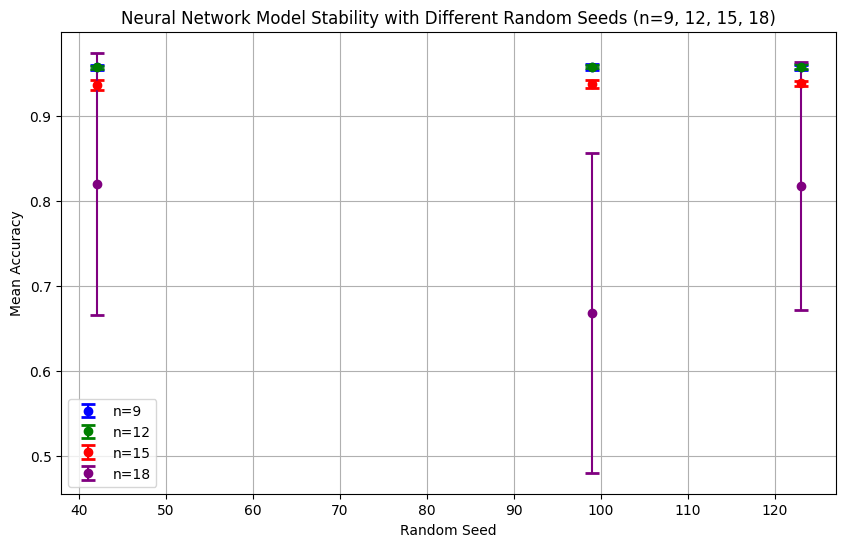

In [ ]:
# Data for each dataset (n=9, n=12, n=15, n=18)
seeds = [42, 99, 123]

# Results generated from previous sections in the notebook

mean_accuracies_9 = [0.9575, 0.9577, 0.9577]
std_accuracies_9 = [0.0032, 0.0036, 0.0027]

mean_accuracies_12 = [0.9575, 0.9585, 0.9585]
std_accuracies_12 = [0.0022, 0.0018, 0.0029]

mean_accuracies_15 = [0.9371, 0.9381, 0.9387]
std_accuracies_15 = [0.0062, 0.0047, 0.0033]

mean_accuracies_18 = [0.8202, 0.6680, 0.8178]
std_accuracies_18 = [0.1547, 0.1882, 0.1463]

# Plotting error bars for all four datasets on the same plot
plt.figure(figsize=(10, 6))

# n=9
plt.errorbar(seeds, mean_accuracies_9, yerr=std_accuracies_9, fmt='o', label='n=9', color='b', capsize=5, capthick=2)

# n=12
plt.errorbar(seeds, mean_accuracies_12, yerr=std_accuracies_12, fmt='o', label='n=12', color='g', capsize=5, capthick=2)

# n=15
plt.errorbar(seeds, mean_accuracies_15, yerr=std_accuracies_15, fmt='o', label='n=15', color='r', capsize=5, capthick=2)

# n=18
plt.errorbar(seeds, mean_accuracies_18, yerr=std_accuracies_18, fmt='o', label='n=18', color='purple', capsize=5, capthick=2)

# Add labels and title
plt.xlabel("Random Seed")
plt.ylabel("Mean Accuracy")
plt.title("Neural Network Model Stability with Different Random Seeds (n=9, 12, 15, 18)")
plt.grid(True)

# Display legend
plt.legend()

# Show the plot
plt.show()

### Code to Reproduce Neural Network Loss Curve

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


def cross_validate_and_plot(X, y, n_splits=5, batch_size=128, patience=10, max_epochs=100):
    class NeuralNet(nn.Module):
        def __init__(self, input_dim):
            super(NeuralNet, self).__init__()
            self.layers = nn.Sequential(
                nn.Linear(input_dim, 128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Linear(64, 1),
                nn.Sigmoid()
            )

        def forward(self, x):
            return self.layers(x)

    def train_model(model, train_loader, val_loader, criterion, optimizer, patience=10):
        best_loss = float('inf')
        epochs_no_improve = 0
        best_model_state = None

        train_losses = []
        val_losses = []

        for epoch in range(max_epochs):
            model.train()
            running_train_loss = 0.0
            for X_batch, y_batch in train_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                optimizer.zero_grad()
                outputs = model(X_batch).squeeze()
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()
                running_train_loss += loss.item()

            epoch_train_loss = running_train_loss / len(train_loader)
            train_losses.append(epoch_train_loss)

            if val_loader is not None:
                model.eval()
                running_val_loss = 0.0
                with torch.no_grad():
                    for X_val, y_val in val_loader:
                        X_val, y_val = X_val.to(device), y_val.to(device)
                        val_outputs = model(X_val).squeeze()
                        val_loss = criterion(val_outputs, y_val)
                        running_val_loss += val_loss.item()

                epoch_val_loss = running_val_loss / len(val_loader)
                val_losses.append(epoch_val_loss)

                if epoch_val_loss < best_loss:
                    best_loss = epoch_val_loss
                    best_model_state = model.state_dict()
                    epochs_no_improve = 0
                else:
                    epochs_no_improve += 1
                    if epochs_no_improve >= patience:
                        model.load_state_dict(best_model_state)
                        break

        model.load_state_dict(best_model_state)
        return model, train_losses, val_losses

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input_dim = X.shape[1]

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    best_fold = None
    best_accuracy = 0.0
    best_train_losses = []
    best_val_losses = []

    # K-fold Cross-validation
    for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
        print(f"Fold {fold}")

        # Split into training and validation sets
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Standardize the training and validation data separately
        scaler = StandardScaler()
        X_train_scaled = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
        X_val_scaled = torch.tensor(scaler.transform(X_val), dtype=torch.float32)

        # Create DataLoaders
        train_dataset = TensorDataset(X_train_scaled, torch.tensor(y_train, dtype=torch.float32))
        val_dataset = TensorDataset(X_val_scaled, torch.tensor(y_val, dtype=torch.float32))
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)

        # Initialize model, criterion, and optimizer
        model = NeuralNet(input_dim).to(device)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Train the model with early stopping
        model, train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, patience)

        # Evaluate on validation set
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_scaled.to(device)).cpu().squeeze()
            y_val_pred = (val_outputs > 0.5).int()
            accuracy = accuracy_score(y_val, y_val_pred)

            # Track the best fold
            if accuracy > best_accuracy:
                best_fold = fold
                best_accuracy = accuracy
                best_train_losses = train_losses
                best_val_losses = val_losses

            print(f"Validation Accuracy (Fold {fold}): {accuracy:.4f}")
            print("=" * 80)

    print(f"Best Fold: {best_fold}, Best Accuracy: {best_accuracy:.4f}")
    return best_train_losses, best_val_losses

In [ ]:
# Load your dataset
X = np.load('Datasets/kryptonite-9-X.npy')
y = np.load('Datasets/kryptonite-9-y.npy')


# Call the function
train_losses_9, val_losses_9 = cross_validate_and_plot(X, y, n_splits=5, batch_size=128, patience=10, max_epochs=100)

# Load your dataset
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')


# Call the function
train_losses_12, val_losses_12 = cross_validate_and_plot(X, y, n_splits=5, batch_size=128, patience=10, max_epochs=100)

# Load your dataset
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')


# Call the function
train_losses_15, val_losses_15 = cross_validate_and_plot(X, y, n_splits=5, batch_size=128, patience=10, max_epochs=100)

# Load your dataset
X = np.load('Datasets/kryptonite-18-X.npy')
y = np.load('Datasets/kryptonite-18-y.npy')


# Call the function
train_losses_18, val_losses_18 = cross_validate_and_plot(X, y, n_splits=5, batch_size=128, patience=10, max_epochs=100)

Fold 1
Validation Accuracy (Fold 1): 0.9564
Fold 2
Validation Accuracy (Fold 2): 0.9606
Fold 3
Validation Accuracy (Fold 3): 0.9597
Fold 4
Validation Accuracy (Fold 4): 0.9583
Fold 5
Validation Accuracy (Fold 5): 0.9511
Best Fold: 2, Best Accuracy: 0.9606
Fold 1
Validation Accuracy (Fold 1): 0.9571
Fold 2
Validation Accuracy (Fold 2): 0.9565
Fold 3
Validation Accuracy (Fold 3): 0.9604
Fold 4
Validation Accuracy (Fold 4): 0.9535
Fold 5
Validation Accuracy (Fold 5): 0.9613
Best Fold: 5, Best Accuracy: 0.9613
Fold 1
Validation Accuracy (Fold 1): 0.9385
Fold 2
Validation Accuracy (Fold 2): 0.9413
Fold 3
Validation Accuracy (Fold 3): 0.9430
Fold 4
Validation Accuracy (Fold 4): 0.9343
Fold 5
Validation Accuracy (Fold 5): 0.9365
Best Fold: 3, Best Accuracy: 0.9430
Fold 1
Validation Accuracy (Fold 1): 0.8824
Fold 2
Validation Accuracy (Fold 2): 0.9056
Fold 3
Validation Accuracy (Fold 3): 0.8950
Fold 4
Validation Accuracy (Fold 4): 0.5236
Fold 5
Validation Accuracy (Fold 5): 0.8822
Best Fold: 2

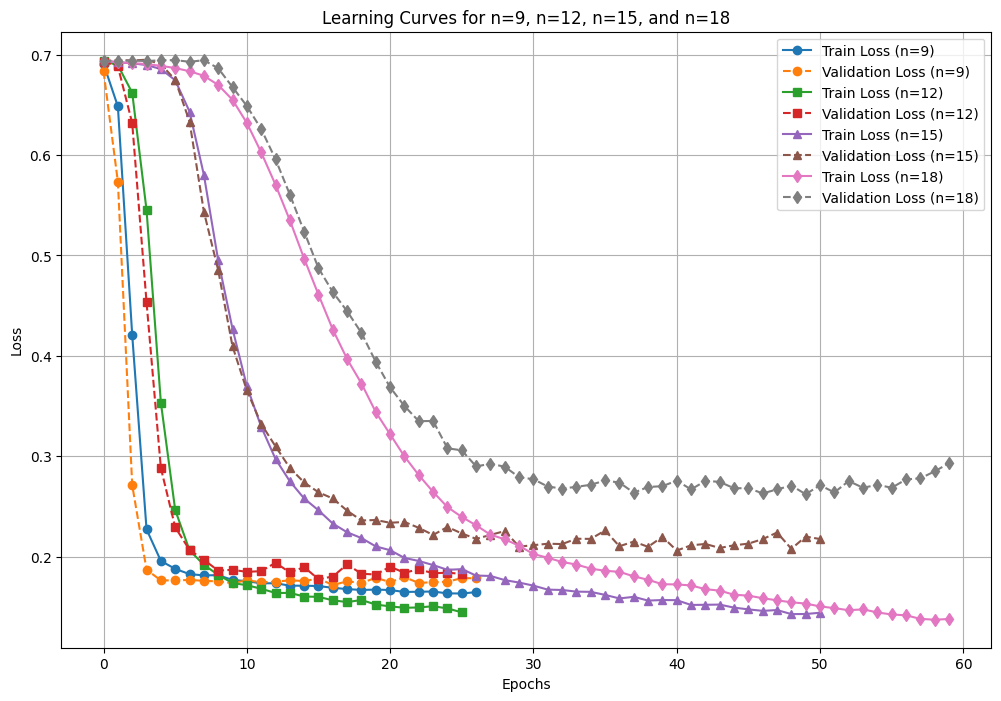

In [ ]:

# Plot all learning curves
plt.figure(figsize=(12, 8))

# Dataset n=9
plt.plot(train_losses_9, label='Train Loss (n=9)', linestyle='-', marker='o')
plt.plot(val_losses_9, label='Validation Loss (n=9)', linestyle='--', marker='o')

# Dataset n=12
plt.plot(train_losses_12, label='Train Loss (n=12)', linestyle='-', marker='s')
plt.plot(val_losses_12, label='Validation Loss (n=12)', linestyle='--', marker='s')

# Dataset n=15
plt.plot(train_losses_15, label='Train Loss (n=15)', linestyle='-', marker='^')
plt.plot(val_losses_15, label='Validation Loss (n=15)', linestyle='--', marker='^')

# Dataset n=18
plt.plot(train_losses_18, label='Train Loss (n=18)', linestyle='-', marker='d')
plt.plot(val_losses_18, label='Validation Loss (n=18)', linestyle='--', marker='d')

# Add labels, title, legend, and grid
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves for n=9, n=12, n=15, and n=18')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Code to Reproduce Plots in the Appendix

Testing combination: Learning Rate=0.001, Batch Size=128
Testing combination: Learning Rate=0.01, Batch Size=128
Testing combination: Learning Rate=0.1, Batch Size=128


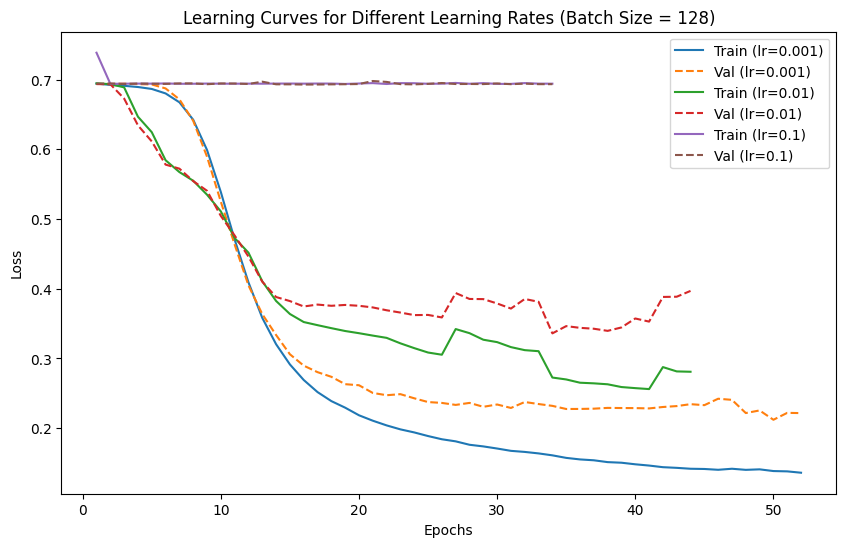

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import itertools
import matplotlib.pyplot as plt

# Load and preprocess data
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

# Split the data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_full = torch.tensor(X_train_full, dtype=torch.float32)
y_train_full = torch.tensor(y_train_full, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define neural network architecture
class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

# Training function with logging
def train_model_with_logging(model, train_loader, val_loader, criterion, optimizer, patience=10):
    best_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    train_losses = []
    val_losses = []

    for epoch in range(100):
        model.train()
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Validation phase
        if val_loader is not None:
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for X_val, y_val in val_loader:
                    X_val, y_val = X_val.to(device), y_val.to(device)
                    val_outputs = model(X_val).squeeze()
                    val_loss += criterion(val_outputs, y_val).item()
            val_losses.append(val_loss / len(val_loader))

            # Early stopping logic
            if val_loss < best_loss:
                best_loss = val_loss
                best_model_state = model.state_dict()
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= patience:
                    model.load_state_dict(best_model_state)
                    break
        else:
            best_model_state = model.state_dict()

    model.load_state_dict(best_model_state)
    return model, train_losses, val_losses

# Define hyperparameter grid (learning rates only)
learning_rates = [0.001, 0.01, 0.1]
batch_size = 128  # Fixed batch size

# Initialize device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_train_full.shape[1]

# Store results
results = []
learning_curves = {}

# Perform grid search and track learning curves
for lr in learning_rates:
    print(f"Testing combination: Learning Rate={lr}, Batch Size={batch_size}")

    # Initialize K-Fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_accuracies = []
    fold_train_losses = []
    fold_val_losses = []

    for fold, (train_index, val_index) in enumerate(kf.split(X_train_full), 1):
        # Split into training and validation sets
        X_train, X_val = X_train_full[train_index], X_train_full[val_index]
        y_train, y_val = y_train_full[train_index], y_train_full[val_index]

        # Standardize the data
        scaler = StandardScaler()
        X_train_scaled = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
        X_val_scaled = torch.tensor(scaler.transform(X_val), dtype=torch.float32)

        # Create DataLoaders
        train_dataset = TensorDataset(X_train_scaled, y_train)
        val_dataset = TensorDataset(X_val_scaled, y_val)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)

        # Initialize model, criterion, and optimizer
        model = NeuralNet(input_dim).to(device)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Train the model with loss tracking
        model, train_losses, val_losses = train_model_with_logging(model, train_loader, val_loader, criterion, optimizer)

        fold_accuracies.append(max(val_losses))  # Record the best validation loss
        fold_train_losses.append(train_losses)
        fold_val_losses.append(val_losses)

    # Align the lengths of fold losses by padding with NaN
    max_epochs = max(len(loss) for loss in fold_train_losses)  # Find the maximum number of epochs

    # Pad each fold's losses with NaN to make them the same length
    padded_train_losses = [np.pad(loss, (0, max_epochs - len(loss)), constant_values=np.nan) for loss in fold_train_losses]
    padded_val_losses = [np.pad(loss, (0, max_epochs - len(loss)), constant_values=np.nan) for loss in fold_val_losses]

    # Compute the mean, ignoring NaN values
    avg_train_losses = np.nanmean(padded_train_losses, axis=0)
    avg_val_losses = np.nanmean(padded_val_losses, axis=0)

    # Save learning curves for this combination
    learning_curves[lr] = (avg_train_losses, avg_val_losses)

# Plot learning curves for each learning rate
plt.figure(figsize=(10, 6))
for lr, (train_losses, val_losses) in learning_curves.items():
    epochs = range(1, len(train_losses) + 1)
    plt.plot(epochs, train_losses, label=f"Train (lr={lr})")
    plt.plot(epochs, val_losses, '--', label=f"Val (lr={lr})")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves for Different Learning Rates (Batch Size = 128)')
plt.legend()
plt.show()

Testing combination: Learning Rate=0.001, Batch Size=32
Testing combination: Learning Rate=0.001, Batch Size=64
Testing combination: Learning Rate=0.001, Batch Size=128


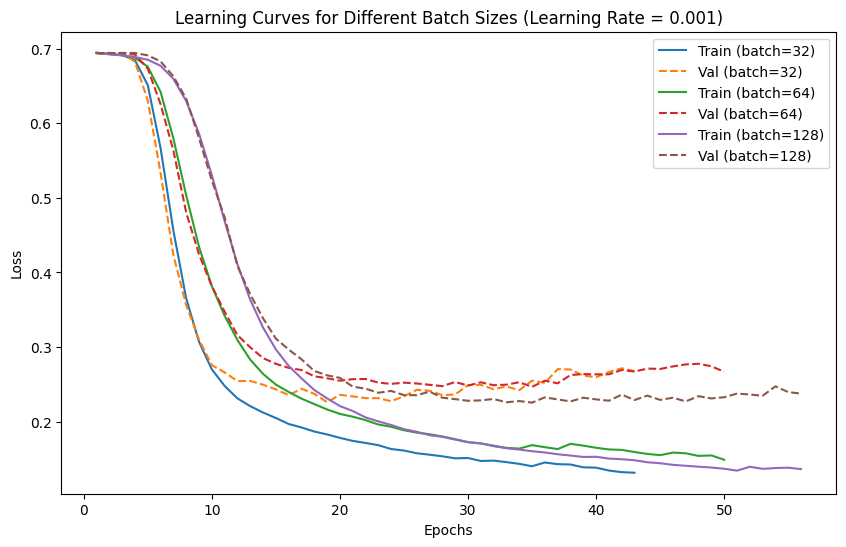

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load and preprocess data
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

# Split the data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_full = torch.tensor(X_train_full, dtype=torch.float32)
y_train_full = torch.tensor(y_train_full, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define neural network architecture
class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

# Training function with logging
def train_model_with_logging(model, train_loader, val_loader, criterion, optimizer, patience=10):
    best_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    train_losses = []
    val_losses = []

    for epoch in range(100):
        model.train()
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Validation phase
        if val_loader is not None:
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for X_val, y_val in val_loader:
                    X_val, y_val = X_val.to(device), y_val.to(device)
                    val_outputs = model(X_val).squeeze()
                    val_loss += criterion(val_outputs, y_val).item()
            val_losses.append(val_loss / len(val_loader))

            # Early stopping logic
            if val_loss < best_loss:
                best_loss = val_loss
                best_model_state = model.state_dict()
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= patience:
                    model.load_state_dict(best_model_state)
                    break
        else:
            best_model_state = model.state_dict()

    model.load_state_dict(best_model_state)
    return model, train_losses, val_losses

# Define batch sizes and fix learning rate
batch_sizes = [32, 64, 128]
learning_rate = 0.001  # Fixed learning rate

# Initialize device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_train_full.shape[1]

# Store results
results = []
learning_curves = {}

# Perform experiments for different batch sizes
for batch_size in batch_sizes:
    print(f"Testing combination: Learning Rate={learning_rate}, Batch Size={batch_size}")

    # Initialize K-Fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_accuracies = []
    fold_train_losses = []
    fold_val_losses = []

    for fold, (train_index, val_index) in enumerate(kf.split(X_train_full), 1):
        # Split into training and validation sets
        X_train, X_val = X_train_full[train_index], X_train_full[val_index]
        y_train, y_val = y_train_full[train_index], y_train_full[val_index]

        # Standardize the data
        scaler = StandardScaler()
        X_train_scaled = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
        X_val_scaled = torch.tensor(scaler.transform(X_val), dtype=torch.float32)

        # Create DataLoaders
        train_dataset = TensorDataset(X_train_scaled, y_train)
        val_dataset = TensorDataset(X_val_scaled, y_val)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)

        # Initialize model, criterion, and optimizer
        model = NeuralNet(input_dim).to(device)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        # Train the model with loss tracking
        model, train_losses, val_losses = train_model_with_logging(model, train_loader, val_loader, criterion, optimizer)

        fold_accuracies.append(max(val_losses))  # Record the best validation loss
        fold_train_losses.append(train_losses)
        fold_val_losses.append(val_losses)

    # Align the lengths of fold losses by padding with NaN
    max_epochs = max(len(loss) for loss in fold_train_losses)  # Find the maximum number of epochs

    # Pad each fold's losses with NaN to make them the same length
    padded_train_losses = [np.pad(loss, (0, max_epochs - len(loss)), constant_values=np.nan) for loss in fold_train_losses]
    padded_val_losses = [np.pad(loss, (0, max_epochs - len(loss)), constant_values=np.nan) for loss in fold_val_losses]

    # Compute the mean, ignoring NaN values
    avg_train_losses = np.nanmean(padded_train_losses, axis=0)
    avg_val_losses = np.nanmean(padded_val_losses, axis=0)

    # Save learning curves for this combination
    learning_curves[batch_size] = (avg_train_losses, avg_val_losses)

# Plot learning curves for each batch size
plt.figure(figsize=(10, 6))
for batch_size, (train_losses, val_losses) in learning_curves.items():
    epochs = range(1, len(train_losses) + 1)
    plt.plot(epochs, train_losses, label=f"Train (batch={batch_size})")
    plt.plot(epochs, val_losses, '--', label=f"Val (batch={batch_size})")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves for Different Batch Sizes (Learning Rate = 0.001)')
plt.legend()
plt.show()

### Code to reproduce Effect of Condition Number C with Logistic Regression

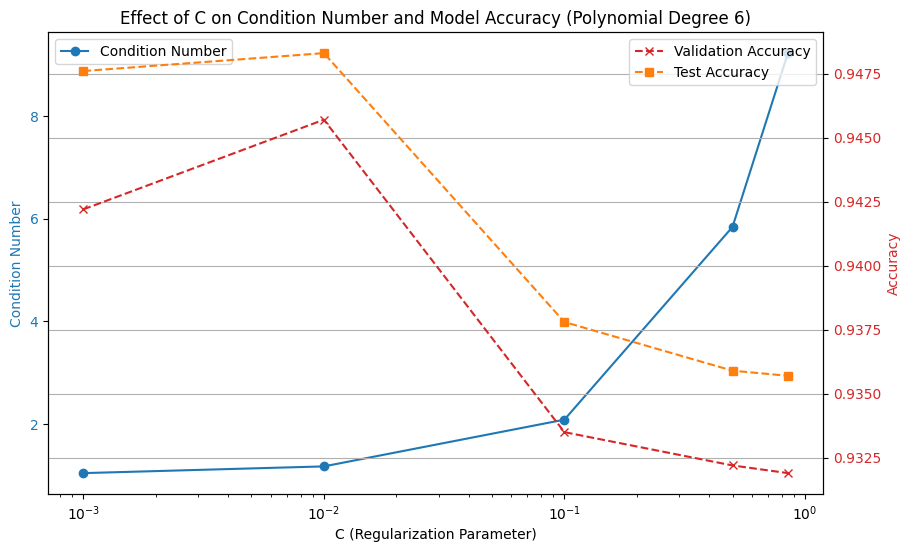

In [ ]:
import matplotlib.pyplot as plt

# Data: values of C, condition numbers with regularization, validation accuracy, and test accuracy
C_vals = [0.001, 0.01, 0.1, 0.5, 0.85]
condition_numbers = [1.0406, 1.1718, 2.0831, 5.8407, 9.2293]
validation_accuracies = [0.9422, 0.9457, 0.9335, 0.9322, 0.9319]
test_accuracies = [0.9476, 0.9483, 0.9378, 0.9359, 0.9357]

# Plot Condition Number vs. C values
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('C (Regularization Parameter)')
ax1.set_ylabel('Condition Number', color=color)
ax1.plot(C_vals, condition_numbers, color=color, marker='o', label='Condition Number')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xscale('log')

# Create a secondary y-axis for accuracy
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(C_vals, validation_accuracies, color='tab:red', marker='x', linestyle='--', label='Validation Accuracy')
ax2.plot(C_vals, test_accuracies, color='tab:orange', marker='s', linestyle='--', label='Test Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

# Add legends for each axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title("Effect of C on Condition Number and Model Accuracy (Polynomial Degree 6)")
plt.grid()
plt.show()